# Import all the necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
sns.set_theme('notebook', palette='pastel')

# Load the dataset
Rename the columns, convert the month average to numerical months and combine with years

In [6]:
df = pd.read_csv('kenya-climate-data-1991-2016-temp-degress-celcius-Copy1.csv')
df

,Year,Month Average,Temperature - (Celsius),Rainfall - (MM)
0,1991,Jan Average,25.1631,38.2847
1,1991,Feb Average,26.0839,12.7492
2,1991,Mar Average,26.2236,73.3656
3,1991,Apr Average,25.5812,83.1350
4,1991,May Average,24.6618,112.2750
...,...,...,...,...
307,2016,Aug Average,24.0942,25.5342
308,2016,Sep Average,24.4370,15.1428
309,2016,Oct Average,26.0317,40.0055
310,2016,Nov Average,25.5692,121.9970


In [7]:
# rename columns for easier referencing
df.rename(columns={'Month Average': 'months', 'Temperature - (Celsius)': 'temp', 'Rainfall - (MM)': 'rain'}, inplace=True)
df.head()

,Year,months,temp,rain
0,1991,Jan Average,25.1631,38.2847
1,1991,Feb Average,26.0839,12.7492
2,1991,Mar Average,26.2236,73.3656
3,1991,Apr Average,25.5812,83.1350
4,1991,May Average,24.6618,112.2750


In [8]:
# remove average from the month averages
df['months'] = df['months'].str.replace(' Average', '')
df.head()

,Year,months,temp,rain
0,1991,Jan,25.1631,38.2847
1,1991,Feb,26.0839,12.7492
2,1991,Mar,26.2236,73.3656
3,1991,Apr,25.5812,83.1350
4,1991,May,24.6618,112.2750


In [9]:
df.months.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [10]:
# create a mapping of each month name to a number then create new column with mapping
d = dict(zip(pd.date_range('2000-01-01', freq='M', periods=12).strftime('%b'), range(1,13)))
print(d)

{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}


In [11]:
# map the months and create a new column, and drop months column
df['months_num'] = df.months.map(d)
df.drop('months', axis=1, inplace=True)
df

,Year,temp,rain,months_num
0,1991,25.1631,38.2847,1
1,1991,26.0839,12.7492,2
2,1991,26.2236,73.3656,3
3,1991,25.5812,83.1350,4
4,1991,24.6618,112.2750,5
...,...,...,...,...
307,2016,24.0942,25.5342,8
308,2016,24.4370,15.1428,9
309,2016,26.0317,40.0055,10
310,2016,25.5692,121.9970,11


In [12]:
# check there are no null values
print(df.months_num.unique())
print(df.months_num.isnull().sum())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
0


In [13]:
# join the months with index with 01 to create full dates
df['months'] = df['Year'].astype('str') + '-' + df['months_num'].astype('str') + '-01'
df['months'] = pd.to_datetime(df.months)
df.drop(['Year', 'months_num'], axis=1, inplace=True)

In [14]:
# set the months to be the index
df.set_index('months', inplace=True)
df

,temp,rain
months,,
1991-01-01,25.1631,38.2847
1991-02-01,26.0839,12.7492
1991-03-01,26.2236,73.3656
1991-04-01,25.5812,83.1350
1991-05-01,24.6618,112.2750
...,...,...
2016-08-01,24.0942,25.5342
2016-09-01,24.4370,15.1428
2016-10-01,26.0317,40.0055


# Visualize The Data


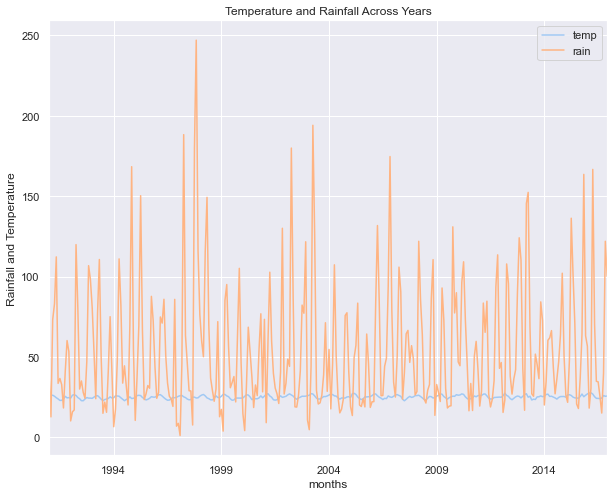

In [15]:
df.plot(figsize=(10,8))
plt.ylabel('Rainfall and Temperature')
plt.title("Temperature and Rainfall Across Years")
plt.show()

The temperature and rainfall clearly have different scales. It may help to have different plots

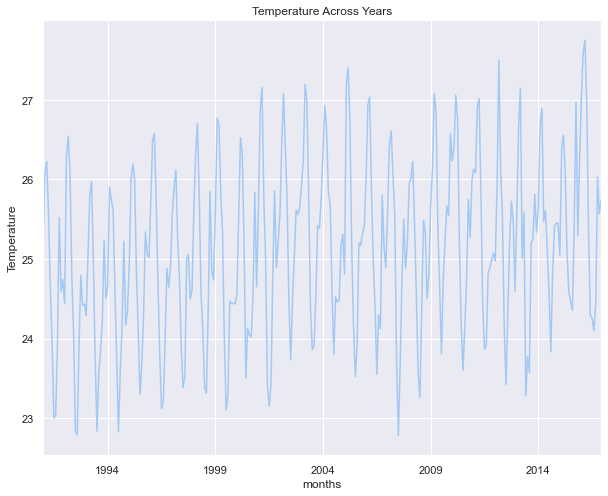

In [16]:
df.temp.plot(figsize=(10,8))
plt.ylabel('Temperature')
plt.title("Temperature Across Years")
plt.show()

There is clear seasonality in both the temperature and rainfall in the country. There is a somewhat upward trend in temperature over the years.

## Decompose to see the trends, seasonality 

In [17]:
import scipy
# !pip install -U statsmodels

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 12.499999999999972, 'Years')

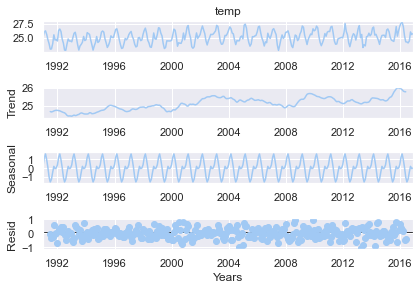

In [19]:
temp_dec = seasonal_decompose(df['temp'])
temp_dec.plot();
plt.xlabel("Years")


Text(0.5, 12.499999999999972, 'Years')

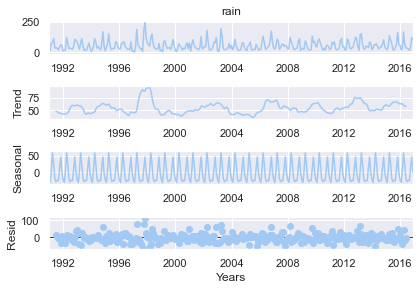

In [20]:
rain_dec = seasonal_decompose(df['rain'])
rain_dec.plot();
plt.xlabel("Years")

The decomponsition helps show the trends better. In the temp plot, you can clearly see that the trend of temperature has been going up. This is to be expected due to climate change. On the other hand, the rainfall trend has remained rather constant except the spike in 1998 which can be explained by the El Nino Rains in Kenay when there was much higher rainfall and flooding. 

# Model Development and Training
## Scaling the data for modeling and Splitting

In [21]:
# split the data into train and test splits to check model performance
# the test data is the last 12 months
train = df[:300]
test = df[300:]
test

,temp,rain
months,,
2016-01-01,27.0367,56.7251
2016-02-01,27.5964,18.2200
2016-03-01,27.7507,30.4865
2016-04-01,26.9416,166.7050
2016-05-01,25.3344,70.6712
2016-06-01,24.2913,34.9050
2016-07-01,24.2560,34.5489
2016-08-01,24.0942,25.5342
2016-09-01,24.4370,15.1428


In [22]:
# scale the data using the minmax scaler to avoid large variances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Timeseries Generator from tensorflow import keras 

In [24]:
# !pip3 install --upgrade tensorflow --user

In [25]:
# from keras.tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

: 

: 

In [31]:
# 12 month generator
n_input = 12
n_features = 2
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

NameError: name 'TimeseriesGenerator' is not defined

## Training

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

: 

: 

In [151]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [152]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 41,402
Trainable params: 41,402
Non-trainable params: 0
_________________________________________________________________


In [153]:
# fit model
model.fit(generator,epochs=100)

Epoch 1/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0745
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0307
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0246
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0231
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0186
Epoch 6/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0144
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 8/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0139
Epoch 9/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 10/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 11/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0140
Epoch 12/100
288/288 [==============================] - 1s 2ms/step - loss: 0.0136
Epoch 13/100


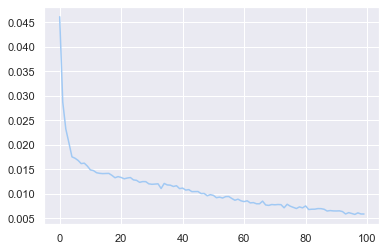

In [154]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

## Implement Model in Last 12 batches of data

In [155]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    # append the prediction into the array
    test_predictions.append(current_pred)
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [156]:
test_predictions

[array([0.6033147 , 0.22705218], dtype=float32),
 array([0.6947697 , 0.18778281], dtype=float32),
 array([0.79513925, 0.20338976], dtype=float32),
 array([0.7783139 , 0.37934345], dtype=float32),
 array([0.5866007, 0.3760761], dtype=float32),
 array([0.44489658, 0.23374848], dtype=float32),
 array([0.27728257, 0.16797985], dtype=float32),
 array([0.36741018, 0.21855992], dtype=float32),
 array([0.59322935, 0.17228825], dtype=float32),
 array([0.6926699 , 0.30174226], dtype=float32),
 array([0.59244096, 0.31731075], dtype=float32),
 array([0.61069846, 0.2814346 ], dtype=float32)]

## Rescale Predictions

In [157]:
true_predictions = scaler.inverse_transform(test_predictions)

In [158]:
test[['temp_preds', 'rain_preds']] = true_predictions
test.head()

<ipython-input-158-1681caf7c50a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['temp_preds', 'rain_preds']] = true_predictions
<ipython-input-158-1681caf7c50a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['temp_preds', 'rain_preds']] = true_predictions


,temp,rain,temp_preds,rain_preds
months,,,,
2016-01-01,27.0367,56.7251,25.628345,56.995083
2016-02-01,27.5964,18.2200,26.060013,47.337827
2016-03-01,27.7507,30.4865,26.533757,51.175942
2016-04-01,26.9416,166.7050,26.454341,94.447062
2016-05-01,25.3344,70.6712,25.549455,93.643545


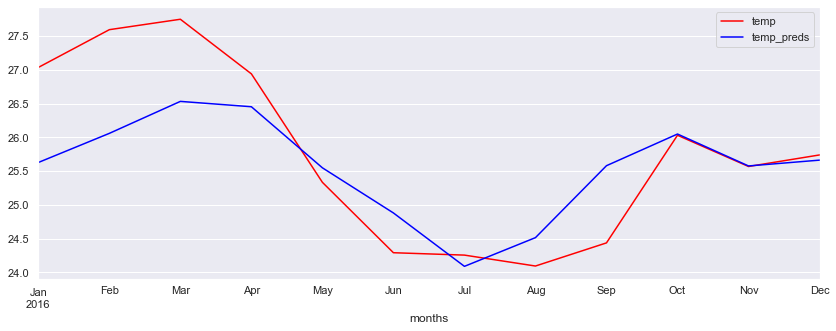

In [159]:
test[['temp', 'temp_preds']].plot(figsize=(14,5), color=['red', 'blue', 'green', 'orange'])
plt.title("temperature for next 12 months")
plt.show()

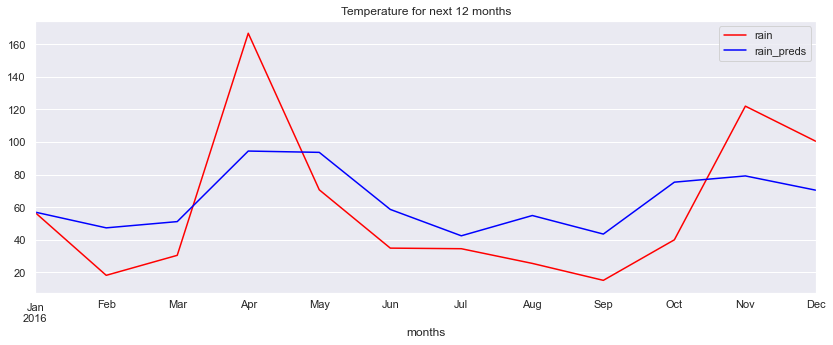

In [161]:
test[['rain', 'rain_preds']].plot(figsize=(14,5), color=['red', 'blue', 'green', 'orange'])
plt.title("Rain for next 12 months")
plt.show()

The model clearly does a better job at predicting the temperature than the rain. This can be attributed to the seasonality observed in the decomposition. There was clearly significantly lower variance in the seasonality of temperature as opposed to that of rain. The same is observed by looking at the residual plots which show the same significant difference. That tells us that even though we can improve the data, there is a lot of variance for rain data. That also tells us that rain predictions will not be the most reliable. We can look further at the RMSE to see the error in predictions for the two weather conditions.

In [164]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['temp'],test['temp_preds']))
print(rmse)

0.8152206311284569


In [165]:
rmse=sqrt(mean_squared_error(test['rain'],test['rain_preds']))
print(rmse)

33.285962599814376


Quite clearly as described, the model has significantly lower errors in predicting temperature as opposed to rain. 

## Create dataframe to Store future 12 month prediction

In [188]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
    
date_list=[df.index[-1] + relativedelta(months = x) for x in range(1, 13)]

In [189]:
date_list=pd.DataFrame(index=date_list)
date_list

""
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01


In [190]:
date_list[['temp_preds', 'rain_preds']] = true_predictions
date_list.head()

,temp_preds,rain_preds
2017-01-01,25.628345,56.995083
2017-02-01,26.060013,47.337827
2017-03-01,26.533757,51.175942
2017-04-01,26.454341,94.447062
2017-05-01,25.549455,93.643545


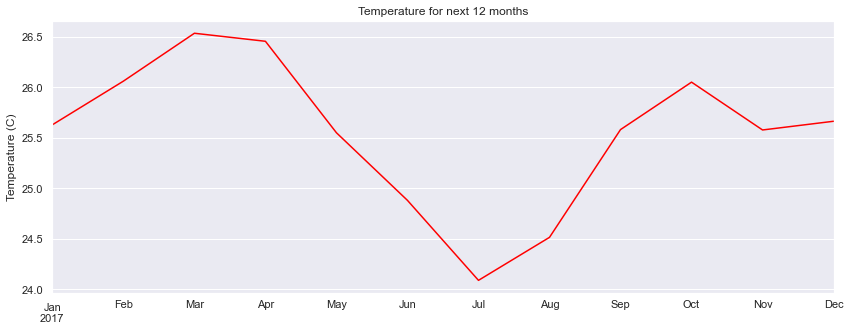

In [195]:
date_list['temp_preds'].plot(figsize=(14,5), color=['red', 'blue', 'green', 'orange'])
plt.ylabel("Temperature (C)")
plt.title("Temperature for next 12 months")
plt.show()

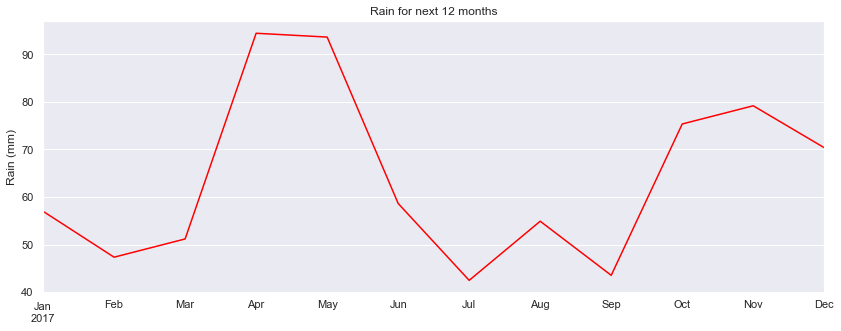

In [196]:
date_list['rain_preds'].plot(figsize=(14,5), color=['red', 'blue', 'green', 'orange'])
plt.ylabel("Rain (mm)")
plt.title("Rain for next 12 months")
plt.show()